<a href="https://colab.research.google.com/github/swapnalisingh13/Advance-ML/blob/main/2348565_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install sweetviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 77.7 MB/s eta 0:00:00


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [39]:
df=pd.read_csv('/content/data.csv')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,02-05-2014 0:00,3.130000e+05,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,02-05-2014 0:00,2.384000e+06,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,02-05-2014 0:00,3.420000e+05,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,02-05-2014 0:00,4.200000e+05,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,02-05-2014 0:00,5.500000e+05,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,09-07-2014 0:00,3.081667e+05,3,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,09-07-2014 0:00,5.343333e+05,3,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,09-07-2014 0:00,4.169042e+05,3,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,10-07-2014 0:00,2.034000e+05,4,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [4]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

EDA

In [ ]:
report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
report.show_html("report.html")

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


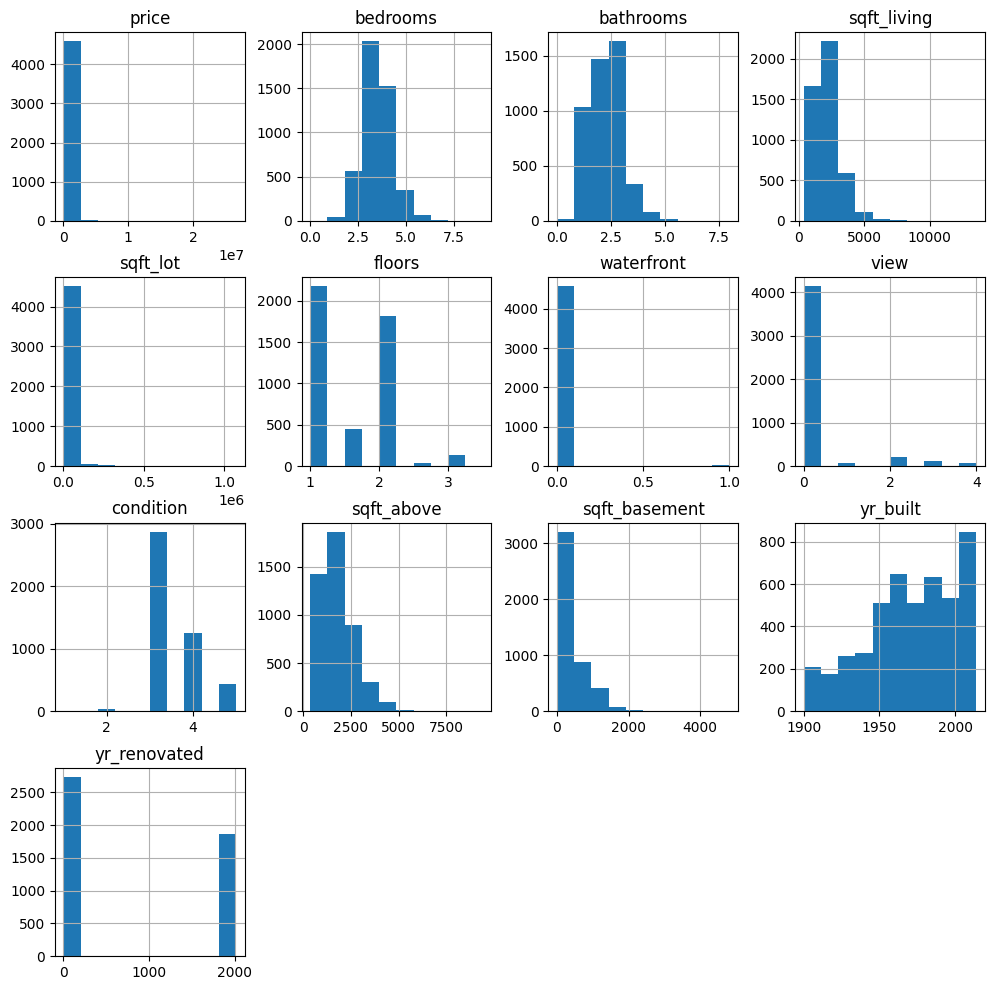

In [5]:
df.hist(figsize=(12,12))
plt.show()

In [6]:
bedroom_groups = df.groupby('bedrooms')
highest_prices = bedroom_groups['price'].max()
lowest_prices = bedroom_groups['price'].min()
high_sqft = bedroom_groups['sqft_living'].max()
low_sqft = bedroom_groups['sqft_living'].min()
result_df = pd.DataFrame({
    'Highest Price': highest_prices,
    'Lowest Price': lowest_prices,
    'Highest sqft' : high_sqft,
    'Lowest sqft' : low_sqft
})
print(result_df)

          Highest Price  Lowest Price  Highest sqft  Lowest sqft
bedrooms                                                        
0             1295648.0     1095000.0          4810         3064
1              540000.0           0.0          2140          370
2             1695000.0           0.0          3180          520
3            26590000.0           0.0          5230          490
4             4489000.0           0.0          6640          980
5             7062500.0           0.0         10040         1120
6             3100000.0           0.0          6980         1370
7             3200000.0      280000.0         13540         1940
8             1970000.0      340000.0          4440         2790
9              599999.0      599999.0          3830         3830


In [7]:
b_groups = df.groupby('condition')
highest_prices = b_groups['price'].max()
lowest_prices = b_groups['price'].min()
high_sqft = b_groups['sqft_living'].max()
low_sqft = b_groups['sqft_living'].min()
print('Condition wise')
result_df = pd.DataFrame({
    'Highest Price': highest_prices,
    'Lowest Price': lowest_prices,
    'Highest sqft' : high_sqft,
    'Lowest sqft' : low_sqft
})
print(result_df)

Condition wise
           Highest Price  Lowest Price  Highest sqft  Lowest sqft
condition                                                        
1               550000.0        7800.0          1940          780
2              2555000.0           0.0          5300          430
3             12899000.0           0.0         13540          380
4             26590000.0           0.0          7050          490
5              3200000.0           0.0          6210          370


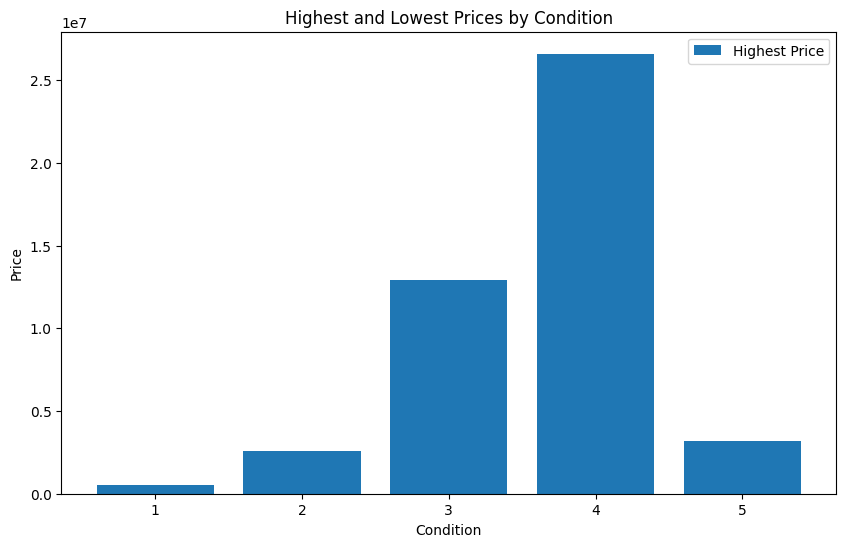

In [8]:
result = df.groupby('condition')['price'].agg(['max']).reset_index()
plt.figure(figsize=(10, 6))
plt.bar(result['condition'].astype(str), result['max'], label='Highest Price')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.title('Highest and Lowest Prices by Condition')
plt.legend()
plt.show()

In [9]:
b_groups = df.groupby('view')
highest_prices = b_groups['price'].max()
lowest_prices = b_groups['price'].min()
high_sqft = b_groups['sqft_living'].max()
low_sqft = b_groups['sqft_living'].min()
print('Views')
result_df = pd.DataFrame({
    'Highest Price': highest_prices,
    'Lowest Price': lowest_prices,
    'Highest sqft' : high_sqft,
    'Lowest sqft' : low_sqft
})
print(result_df)

Views
      Highest Price  Lowest Price  Highest sqft  Lowest sqft
view                                                        
0        26590000.0        0.0000          8020          370
1         2400000.0   180785.7143          5270         1170
2         7062500.0        0.0000         10040          800
3         2475000.0        0.0000          6490          830
4         4668000.0        0.0000         13540          840


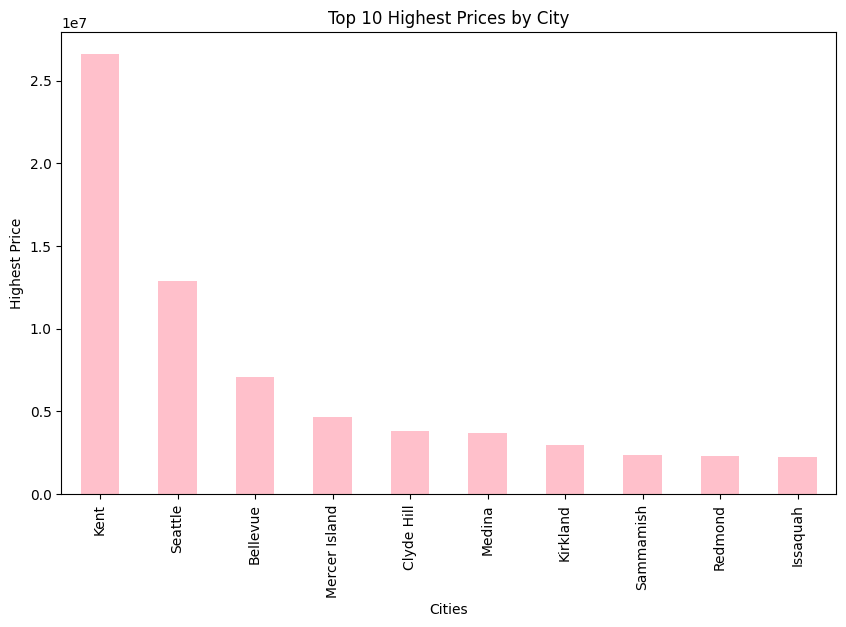

In [34]:
city_10 = df.groupby('city')['price'].max().sort_values(ascending=False)[:10]
plt.figure(figsize=(10, 6))
city_10.plot(kind='bar', color='pink')
plt.xlabel('Cities')
plt.ylabel('Highest Price')
plt.title('Top 10 Highest Prices by City')
plt.show()

From here we know that Price is our target variable.
We can compile from above data:


1.   "sqft_living" has the highest positive correlation.
2.   "bathrooms" and "sqft_above" also have strong positive correlations.
3.   "floors" and "view" have moderate positive correlations.

4.  "yr_renovated" has a negative correlation.


In [41]:
#removing columns with non-important entries.
df=df.drop(columns=['date','street','statezip','country'])

In [42]:
X = df.drop(columns=['price','city'])
y = df['price']
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X, y)
feature_importance = rf.feature_importances_
print("Feature Importances:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importances:
bedrooms: 0.019293538917771417
bathrooms: 0.06988688510295296
sqft_living: 0.32517907851668687
sqft_lot: 0.12293668793715316
floors: 0.011978814392210576
waterfront: 0.00940204331156189
view: 0.016593678266842375
condition: 0.056175470428688735
sqft_above: 0.08323807871803904
sqft_basement: 0.05106956333929553
yr_built: 0.1859196596250113
yr_renovated: 0.048326501443786016


In [43]:
df.corr()

<ipython-input-43-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


Important Features

this data shows that 'sqft_living' and 'yr_built' contributes more. i.e they help in prediction of elements. 'waterfront' helps less to predict the relationship.

<ipython-input-14-712c4e9c65cb>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cnf=df.corr()


<Axes: >

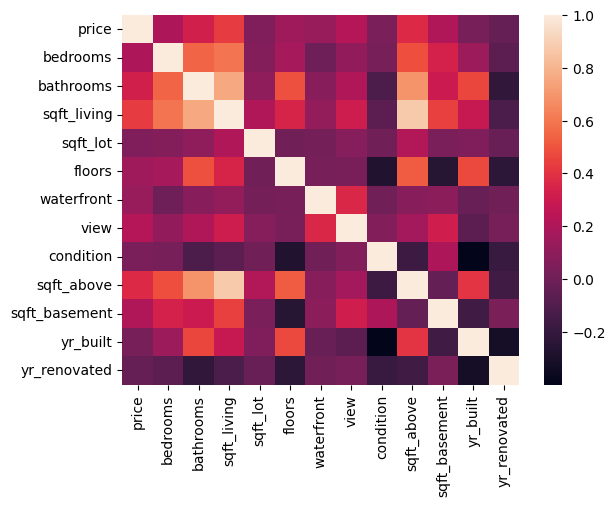

In [14]:
cnf=df.corr()
sns.heatmap(cnf)

the warmer the color towards red more correlated they are. More redder more positive correlation. More black or purple more negatively correlated they are.

Example- To analyze 'yr_built' column in the dataset.

from graph we can see that it is highly correlated to bathroom, sqft_above and floors.

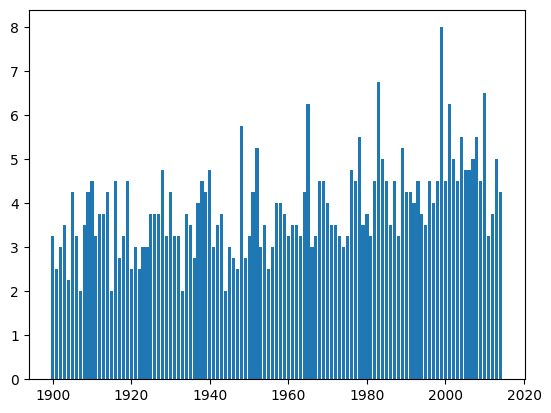

In [15]:
plt.bar(df['yr_built'],df['bathrooms'])
plt.plot()
plt.show()

In [ ]:
#pairplot


Binning

In [ ]:
pg=df['sqft_above'].max()
pg

9410

In [ ]:
pg=df['sqft_above'].min()
pg

370

In [45]:
bin_edges = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 9500]
df['sqft_above_bins'] = pd.cut(df['sqft_above'], bins=bin_edges, include_lowest=True)
print(df)

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05         3       1.50         1340      7912     1.5   
1     2.384000e+06         5       2.50         3650      9050     2.0   
2     3.420000e+05         3       2.00         1930     11947     1.0   
3     4.200000e+05         3       2.25         2000      8030     1.0   
4     5.500000e+05         4       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05         3       1.75         1510      6360     1.0   
4596  5.343333e+05         3       2.50         1460      7573     2.0   
4597  4.169042e+05         3       2.50         3010      7014     2.0   
4598  2.034000e+05         4       2.00         2090      6630     1.0   
4599  2.206000e+05         3       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3    

In [ ]:
pg=df['yr_built'].max()
pg

2014

In [ ]:
pg=df['yr_built'].min()
pg

1900

In [46]:
bin_edges = [1890,1910,1930,1950,1970,1990,2010,2020]
df['yr_built_bins'] = pd.cut(df['yr_built'], bins=bin_edges, include_lowest=True)
print(df)

             price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     3.130000e+05         3       1.50         1340      7912     1.5   
1     2.384000e+06         5       2.50         3650      9050     2.0   
2     3.420000e+05         3       2.00         1930     11947     1.0   
3     4.200000e+05         3       2.25         2000      8030     1.0   
4     5.500000e+05         4       2.50         1940     10500     1.0   
...            ...       ...        ...          ...       ...     ...   
4595  3.081667e+05         3       1.75         1510      6360     1.0   
4596  5.343333e+05         3       2.50         1460      7573     2.0   
4597  4.169042e+05         3       2.50         3010      7014     2.0   
4598  2.034000e+05         4       2.00         2090      6630     1.0   
4599  2.206000e+05         3       2.50         1490      8102     2.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0              0     0          3    

In [47]:
b_groups = df.groupby('yr_built_bins')
highest_prices = b_groups['price'].max()
lowest_prices = b_groups['price'].min()
high_sqft = b_groups['sqft_living'].max()
low_sqft = b_groups['sqft_living'].min()
print('Yr built')
result_df = pd.DataFrame({
    'Highest Price': highest_prices,
    'Lowest Price': lowest_prices,
    'Highest sqft' : high_sqft,
    'Lowest sqft' : low_sqft
})
print(result_df)

Yr built
                    Highest Price  Lowest Price  Highest sqft  Lowest sqft
yr_built_bins                                                             
(1889.999, 1910.0]      3200000.0      150000.0          6210          700
(1910.0, 1930.0]        2555000.0           0.0          5340          370
(1930.0, 1950.0]        7062500.0           0.0         10040          580
(1950.0, 1970.0]       12899000.0           0.0          8670          380
(1970.0, 1990.0]        4668000.0           0.0          9640          590
(1990.0, 2010.0]       26590000.0           0.0         13540          550
(2010.0, 2020.0]        2351956.0           0.0          5010         1100


In [48]:
b_groups = df.groupby('sqft_above_bins')
highest_prices = b_groups['price'].max()
lowest_prices = b_groups['price'].min()
high_sqft = b_groups['sqft_living'].max()
low_sqft = b_groups['sqft_living'].min()
print('Square Feet above')
result_df = pd.DataFrame({
    'Highest Price': highest_prices,
    'Lowest Price': lowest_prices,
    'Highest sqft' : high_sqft,
    'Lowest sqft' : low_sqft
})
print(result_df)

Square Feet above
                  Highest Price  Lowest Price  Highest sqft  Lowest sqft
sqft_above_bins                                                         
(-0.001, 1000.0]       850000.0           0.0          2000          370
(1000.0, 2000.0]     26590000.0           0.0          3990         1010
(2000.0, 3000.0]      2400000.0           0.0          5700         2009
(3000.0, 4000.0]      3710000.0           0.0          6490         3001
(4000.0, 5000.0]      4668000.0           0.0          9640         4030
(5000.0, 6000.0]      3100000.0      692000.0          6980         5010
(6000.0, 7000.0]      4489000.0     1550000.0          8670         6050
(7000.0, 8000.0]      7062500.0     1135250.0         10040         7320
(8000.0, 9000.0]            0.0           0.0          8020         8020
(9000.0, 9500.0]      2280000.0     2280000.0         13540        13540


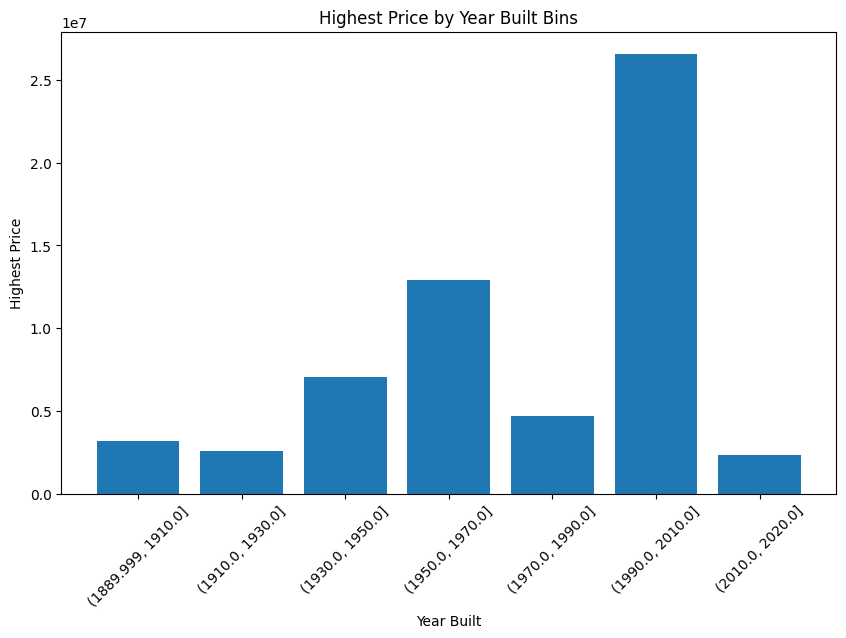

In [49]:
#To display the highest price for each time period
grouped = df.groupby('yr_built_bins')['price'].max().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(grouped['yr_built_bins'].astype(str), grouped['price'])
plt.xlabel('Year Built')
plt.ylabel('Highest Price')
plt.title('Highest Price by Year Built Bins')
plt.xticks(rotation=45)
plt.show()

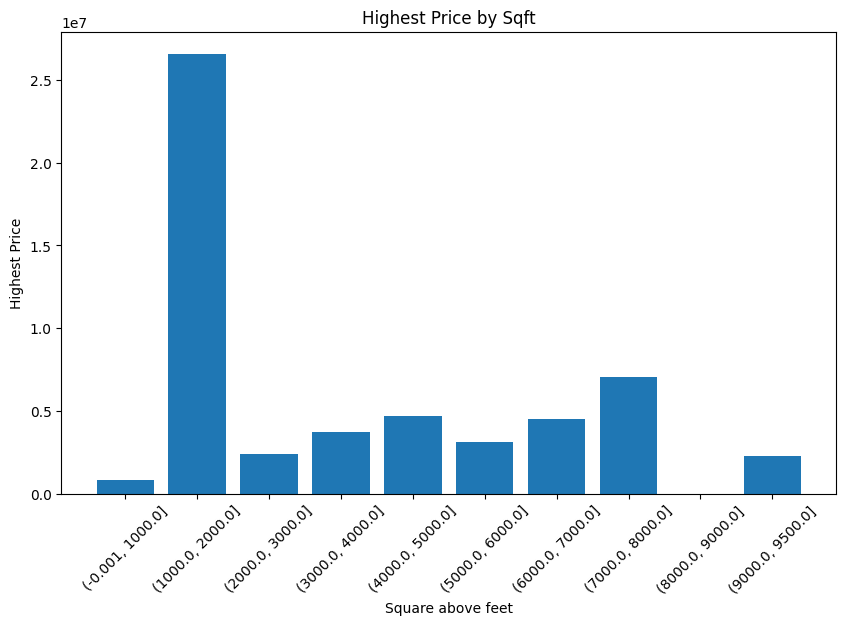

In [50]:
#To display the highest price for each sqft above
grouped = df.groupby('sqft_above_bins')['price'].max().reset_index()
plt.figure(figsize=(10, 6))
plt.bar(grouped['sqft_above_bins'].astype(str), grouped['price'])
plt.xlabel('Square above feet')
plt.ylabel('Highest Price')
plt.title('Highest Price by Sqft')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city
0,313000.0,3,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline
1,2384000.0,5,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle
2,342000.0,3,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent
3,420000.0,3,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue
4,550000.0,4,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond


MinMax Scaling

In [52]:
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
scaler = MinMaxScaler()
df_norm=df
df_norm[columns] = scaler.fit_transform(df[columns])

In [53]:
df_norm.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,sqft_above_bins,yr_built_bins
0,0.011771,0.333333,0.18750,0.073652,0.006775,0.2,0,0.0,0.50,0.107301,0.000000,0.482456,0.995531,Shoreline,"(1000.0, 2000.0]","(1950.0, 1970.0]"
1,0.089658,0.555556,0.31250,0.249051,0.007835,0.4,0,1.0,1.00,0.331858,0.058091,0.184211,0.000000,Seattle,"(3000.0, 4000.0]","(1910.0, 1930.0]"
2,0.012862,0.333333,0.25000,0.118451,0.010534,0.0,0,0.0,0.75,0.172566,0.000000,0.578947,0.000000,Kent,"(1000.0, 2000.0]","(1950.0, 1970.0]"
3,0.015795,0.333333,0.28125,0.123766,0.006885,0.0,0,0.0,0.75,0.069690,0.207469,0.552632,0.000000,Bellevue,"(-0.001, 1000.0]","(1950.0, 1970.0]"
4,0.020684,0.444444,0.31250,0.119210,0.009186,0.0,0,0.0,0.75,0.085177,0.165975,0.666667,0.989076,Redmond,"(1000.0, 2000.0]","(1970.0, 1990.0]"


Z-Score

In [54]:
scaler = StandardScaler()
columns = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated']
df_z=df
df_z[columns] = scaler.fit_transform(df[columns])